In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, f

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel("final_dataset.xlsx")
df

,Country,gdp_growth,nat_res_rent,fertility,health_expend,comp_education,reg_quality,unemployment,consumption,rural pop,gdp_per_cap,country_type,bottom_50,top_10
0,Angola,1.199211,29.967435,5.304,2.911835,6,-0.670015,10.384,52.265464,32.540,2300.974614,developing,0.0864,0.5801
1,Argentina,10.398249,2.653089,1.885,9.984381,14,-0.631173,8.740,76.737333,7.771,12402.490791,developing,0.1411,0.4391
2,Armenia,5.700000,7.054300,1.575,12.241035,12,0.131828,12.729,87.803692,36.569,4522.319045,developing,0.1295,0.4677
3,Australia,2.236212,13.357875,1.700,10.648995,10,1.831183,5.120,72.957371,13.638,59339.684345,developed,0.1645,0.3291
4,Austria,4.556851,0.117856,1.480,11.474260,13,1.340416,6.180,71.557408,41.005,45238.390714,developed,0.2156,0.3415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Uzbekistan,7.403368,20.465161,3.173,6.747415,12,-0.595436,6.017,76.374867,49.573,3356.033255,developing,0.1129,0.4830
128,Viet Nam,2.561551,2.547017,1.944,4.680668,10,-0.404661,2.380,65.045603,61.948,3409.024717,developing,0.1337,0.4582
129,South Africa,4.913097,7.328579,2.374,8.583298,9,-0.090709,28.770,81.321483,32.153,5947.887199,developing,0.0555,0.6541
130,Zambia,4.598734,35.264148,4.308,5.617884,7,-0.570348,6.220,49.872517,54.808,1257.934757,developing,0.0663,0.6174


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         132 non-null    object 
 1   gdp_growth      132 non-null    float64
 2   nat_res_rent    132 non-null    float64
 3   fertility       132 non-null    float64
 4   health_expend   132 non-null    float64
 5   comp_education  132 non-null    int64  
 6   reg_quality     132 non-null    float64
 7   unemployment    132 non-null    float64
 8   consumption     132 non-null    float64
 9   rural pop       132 non-null    float64
 10  gdp_per_cap     132 non-null    float64
 11  country_type    132 non-null    object 
 12  bottom_50       132 non-null    float64
 13  top_10          132 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 14.6+ KB


In [ ]:
df['target'] = df['top_10'] / df['bottom_50']

In [ ]:
df.describe()

,gdp_growth,nat_res_rent,fertility,health_expend,comp_education,reg_quality,unemployment,consumption,rural pop,gdp_per_cap,bottom_50,top_10,target
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,5.988327,7.174400,2.472621,7.052807,10.015152,0.077906,7.524227,77.338949,36.669727,15750.083202,0.147961,0.438395,3.684139
std,4.855664,10.135278,1.260116,2.927554,2.421232,0.961666,4.823726,15.053529,20.159575,21092.413335,0.056963,0.098685,2.309658
min,-7.001239,0.000000,0.808000,2.393778,5.000000,-1.732520,0.170000,35.904578,0.000000,370.675750,0.045400,0.125400,0.253743
25%,3.623570,0.446591,1.578750,4.571980,9.000000,-0.640721,4.273750,68.177768,19.717500,2243.802843,0.107700,0.346500,1.890653
50%,5.371159,2.024873,1.887000,6.763373,10.000000,-0.077881,6.018500,77.307054,35.787000,6027.670954,0.142100,0.447200,3.194109
75%,7.592235,9.039348,3.215250,9.174074,12.000000,0.832887,9.387500,87.599401,51.121000,19202.251365,0.183425,0.516975,4.676933
max,41.745101,43.445858,6.255000,18.815826,16.000000,2.226899,28.770000,121.192083,82.432000,107792.189004,0.494200,0.654100,12.665198


## Содержание переменных:  
$1)$ Country - название страны  
$2)$ gdp_growth - темп роста ВВП страны в 2021 году (%)
$3)$ nat_res_rent - вклад ренты от использования полезных ископаемых в ВВП страны в 2021 году (%)  
$4)$ fertility - суммарный коэффициент рождаемости  на одну женщину в 2021 году  
$5)$ health_expend - расходы на здравоохранение в 2020 году (% от ВВП)  
$6)$ comp_education - продолжительность обязательного образования в стране в 2021 году  
$7)$ reg_quality - восприятие способности и возможности правительства разрабатывать и применять законы для развития частного сектора в 2021 году (нормализованная величина), из Daniel Kaufmann and Aart Kraay (2023). Worldwide Governance Indicators, 2023 Update (www.govindicators.org)  
$8)$ unemployment - уровень безработицы в стране в 2021 году (%)  
$9)$ rural_pop - население, проживающее в сельской местности в 2021 году (%)  
$10)$ gdp_per_cap - ВВП на душу население страны в 2021 году  
$11)$ country_type - уровень развития страны (развитая/развивающаяся)
$12)$ bottom_50 - доля дохода, получаемого 50% наименее обеспеченного населения в 2021 году  
$12)$ top_10 - доля дохода, получаемого 10% наиболее обеспеченного населения в 2021 году

## Распределение зависимой переменной

[Text(0.5, 1.0, 'Гистограмма показателя "Отношение дохода 10% наиболее обеспеченных к 50% наименее обеспеченных"')]

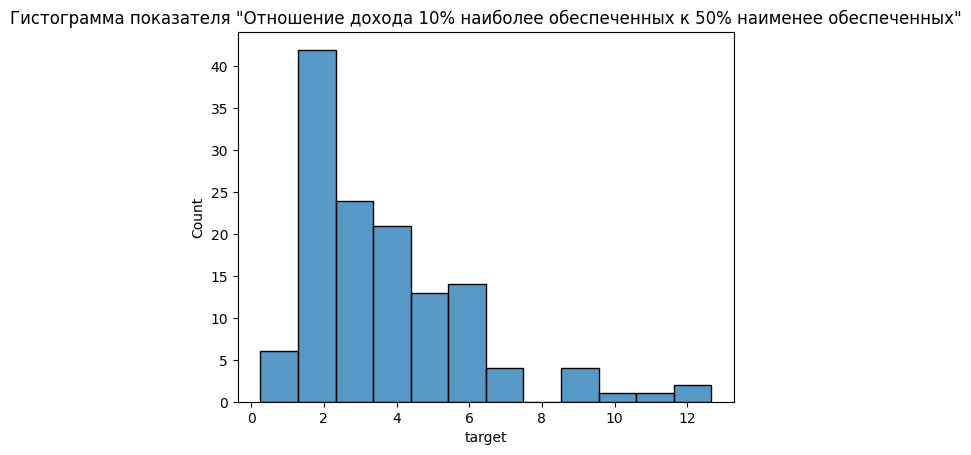

In [ ]:
sns.histplot(data = df, x= 'target').set(title = 'Гистограмма показателя "Отношение дохода 10% наиболее обеспеченных к 50% наименее обеспеченных"')

In [ ]:
x = np.linspace(chi2.ppf(0.01, 4), chi2.ppf(0.99, 4), 1000)
y = chi2.pdf(x, 4)

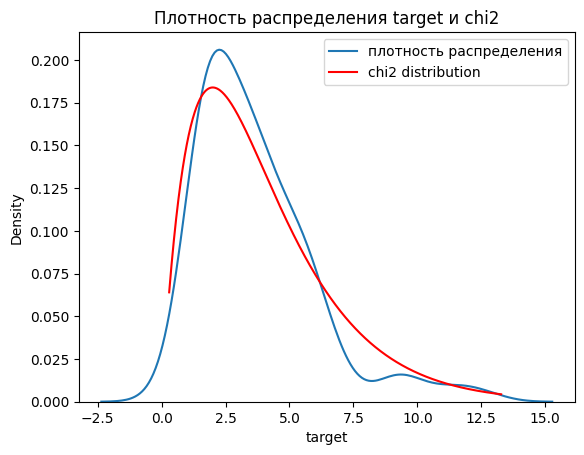

In [ ]:
sns.kdeplot(data = df, x= 'target', label = 'плотность распределения').set(title = 'Плотность распределения target и chi2')
plt.plot(x,y, c = 'r', label = 'chi2 distribution')
plt.legend()

Таким образом, распределение целевой переменной практически полностью соответсвует распределению $\chi^2$ с 4 степенями свободы

## Взаимосвязь между целевой и объясняющими переменными, удаление выбросов

In [ ]:
df['target'].describe()

count    132.000000
mean       3.684139
std        2.309658
min        0.253743
25%        1.890653
50%        3.194109
75%        4.676933
max       12.665198
Name: target, dtype: float64

[Text(0.5, 1.0, 'Связь ВВП на душу населения с целевой переменной')]

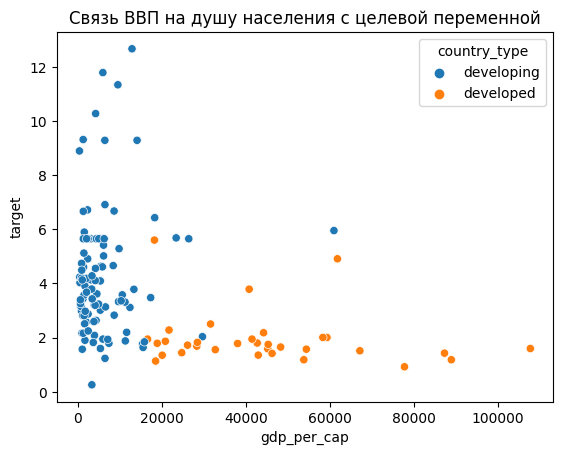

In [ ]:
sns.scatterplot(data =df, x= 'gdp_per_cap', y = 'target', hue = 'country_type').set(title = 'Связь ВВП на душу населения с целевой переменной')

[Text(0.5, 1.0, 'Связь темпа роста ВВП с целевой переменной')]

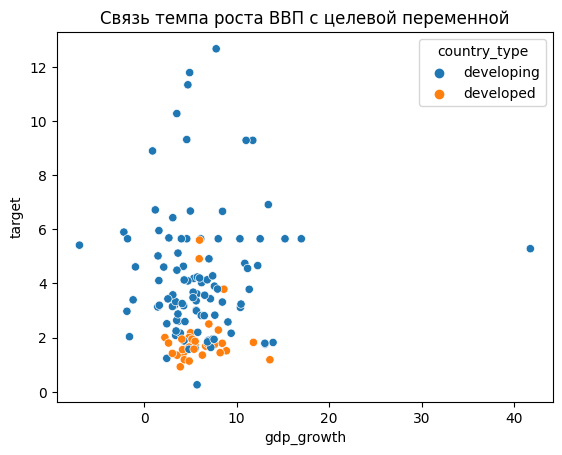

In [ ]:
sns.scatterplot(data =df, x= 'gdp_growth', y = 'target', hue = 'country_type').set(title = 'Связь темпа роста ВВП с целевой переменной')

[Text(0.5, 1.0, 'Связь качества управления с целевой переменной')]

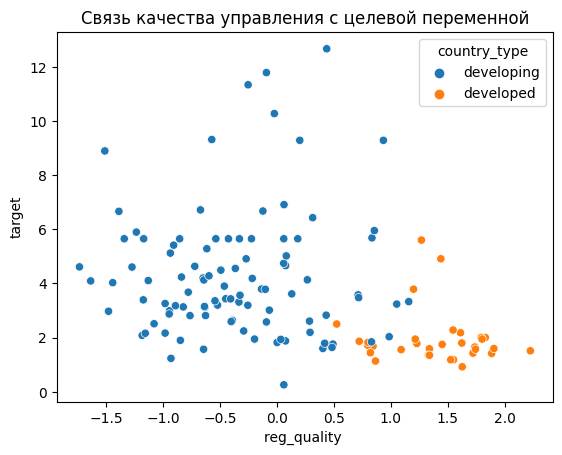

In [ ]:
sns.scatterplot(data =df, x= 'reg_quality ', y = 'target', hue = 'country_type').set(title = 'Связь качества управления с целевой переменной')

<ipython-input-15-0f24450aee64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['top_10', 'bottom_50'],axis = 1).corr())


<Axes: >

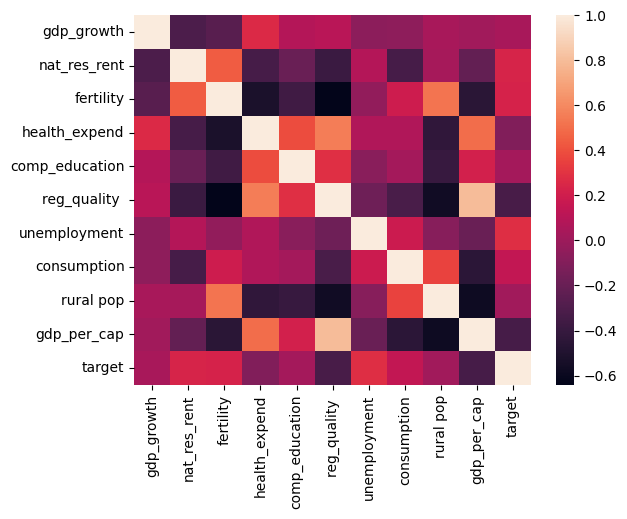

In [ ]:
sns.heatmap(df.drop(['top_10', 'bottom_50'],axis = 1).corr())

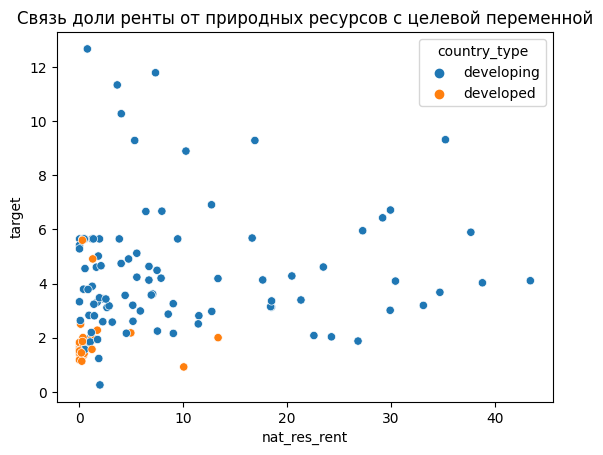

In [ ]:
sns.scatterplot(data =df, x= 'nat_res_rent', y = 'target', hue = 'country_type').set(title = 'Связь доли ренты от природных ресурсов с целевой переменной')
plt.rcParams["figure.figsize"] = (8,8)

[Text(0.5, 1.0, 'Связь уровня фертильности с целевой переменной')]

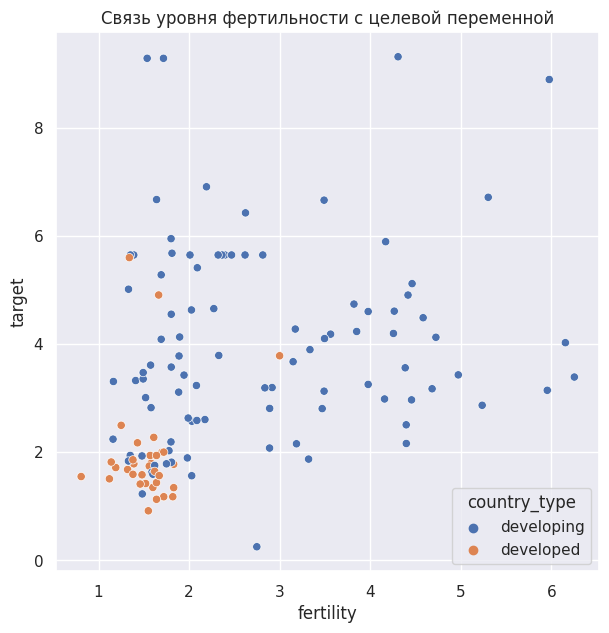

In [ ]:
sns.scatterplot(data =df, x= 'fertility', y = 'target', hue = 'country_type').set(title = 'Связь уровня фертильности с целевой переменной')

In [ ]:
df.drop(['top_10', 'bottom_50'],axis = 1).corr()

<ipython-input-71-8c2ab02e989a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(['top_10', 'bottom_50'],axis = 1).corr()


,gdp_growth,nat_res_rent,fertility,health_expend,comp_education,reg_quality,unemployment,consumption,rural pop,gdp_per_cap,target
gdp_growth,1.000000,-0.309771,-0.261135,0.264359,0.084015,0.101797,-0.056892,-0.051628,0.047627,0.015028,0.068721
nat_res_rent,-0.309771,1.000000,0.437173,-0.335575,-0.193882,-0.386163,0.115171,-0.333359,0.028973,-0.226808,0.336172
fertility,-0.261135,0.437173,1.000000,-0.528960,-0.355582,-0.643625,-0.055070,0.182262,0.519305,-0.459830,0.317395
health_expend,0.264359,-0.335575,-0.528960,1.000000,0.409962,0.558187,0.042866,0.067580,-0.439493,0.502406,-0.170995
comp_education,0.084015,-0.193882,-0.355582,0.409962,1.000000,0.293130,-0.043148,0.043645,-0.385737,0.219540,-0.015936
reg_quality,0.101797,-0.386163,-0.643625,0.558187,0.293130,1.000000,-0.202360,-0.327401,-0.568584,0.796318,-0.412869
unemployment,-0.056892,0.115171,-0.055070,0.042866,-0.043148,-0.202360,1.000000,0.158178,-0.087092,-0.190998,0.086921
consumption,-0.051628,-0.333359,0.182262,0.067580,0.043645,-0.327401,0.158178,1.000000,0.359211,-0.449650,0.122264
rural pop,0.047627,0.028973,0.519305,-0.439493,-0.385737,-0.568584,-0.087092,0.359211,1.000000,-0.585387,0.075939
gdp_per_cap,0.015028,-0.226808,-0.459830,0.502406,0.219540,0.796318,-0.190998,-0.449650,-0.585387,1.000000,-0.377085


In [ ]:
df.drop(['top_10', 'bottom_50'],axis = 1).corr().to_csv('correlation.csv')

<ipython-input-72-5c7f457808c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(['top_10', 'bottom_50'],axis = 1).corr().to_csv('correlation.csv')


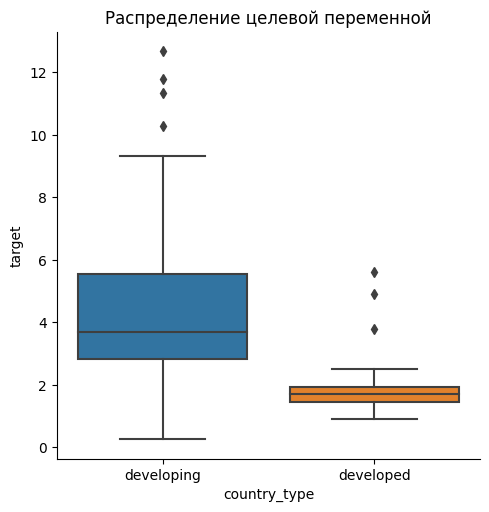

In [ ]:
sns.catplot(data = df, kind = 'box', y = 'target', x ='country_type').set(title = 'Распределение целевой переменной')
sns.set(rc={'figure.figsize':(3,2)})
plt.show()

In [ ]:
df[df['target'] > 10][['Country', 'target']]

,Country,target
30,Costa Rica,12.665198
79,Mexico,11.335088
88,Namibia,10.272000
129,South Africa,11.785586


In [ ]:
df['country_type'].value_counts()

developing    99
developed     33
Name: country_type, dtype: int64

In [ ]:
df = df[df['target'] < 10]

In [ ]:
len(df)

128

# Регрессионный анализ

In [ ]:
df_for_reg = pd.get_dummies(df.drop('Country',axis = 1),drop_first=True)

In [ ]:
df_for_reg

,gdp_growth,nat_res_rent,fertility,health_expend,comp_education,reg_quality,unemployment,consumption,rural pop,gdp_per_cap,bottom_50,top_10,target,country_type_developing
0,1.199211,29.967435,5.304,2.911835,6,-0.670015,10.384,52.265464,32.540,2300.974614,0.0864,0.5801,6.714120,1
1,10.398249,2.653089,1.885,9.984381,14,-0.631173,8.740,76.737333,7.771,12402.490791,0.1411,0.4391,3.111977,1
2,5.700000,7.054300,1.575,12.241035,12,0.131828,12.729,87.803692,36.569,4522.319045,0.1295,0.4677,3.611583,1
3,2.236212,13.357875,1.700,10.648995,10,1.831183,5.120,72.957371,13.638,59339.684345,0.1645,0.3291,2.000608,0
4,4.556851,0.117856,1.480,11.474260,13,1.340416,6.180,71.557408,41.005,45238.390714,0.2156,0.3415,1.583952,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,5.945485,1.279944,1.664,18.815826,12,1.440957,5.350,82.591634,17.127,61829.845627,0.0975,0.4785,4.907692,0
127,7.403368,20.465161,3.173,6.747415,12,-0.595436,6.017,76.374867,49.573,3356.033255,0.1129,0.4830,4.278122,1
128,2.561551,2.547017,1.944,4.680668,10,-0.404661,2.380,65.045603,61.948,3409.024717,0.1337,0.4582,3.427076,1
130,4.598734,35.264148,4.308,5.617884,7,-0.570348,6.220,49.872517,54.808,1257.934757,0.0663,0.6174,9.312217,1


In [ ]:
X = df_for_reg.drop(['top_10', 'bottom_50','target'],axis = 1)
y = df['target']

In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     6.113
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           7.76e-08
Time:                        14:45:55   Log-Likelihood:                -231.81
No. Observations:                 128   AIC:                             487.6
Df Residuals:                     116   BIC:                             521.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1555      1.528     -0.102      0.919      -3.182       2.871
gdp_growth                  0.0680      0.034      1.993      0.049       0.000       0.136
nat_res_rent                0.0371      0.021      1.803      0.074      -0.004       0.078
fertility                   0.3833      0.175      2.188      0.031       0.036       0.730
health_expend               0.0922      0.077      1.196      0.234      -0.060       0.245
comp_education              0.0197      0.068      0.290      0.772      -0.114       0.154
reg_quality                -0.0607      0.309     -0.196      0.845      -0.673       0.552
unemployment               -0.0168      0.036     -0.466      0.642      -0.088       0.055
consumption                 0.0136      0.014      0.950      0.344      -0.015       0.042
rural pop                  -0.0282      0.010     -2.764      0.007      -0.048      -0.008
gdp_per_cap             -6.326e-06   1.33e-05     -0.476      0.635   -3.26e-05       2e-05
country_type_developing     1.8058      0.626      2.887      0.005       0.567       3.045
==============================================================================
Omnibus:                       17.524   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.624
Skew:                           0.842   Prob(JB):                     3.32e-05
Kurtosis:                       4.014   Cond. No.                     3.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Решение проблемы мультиколлинеарности и построение итоговой модели

In [ ]:
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
vif_data

,variable,VIF
0,gdp_growth,3.522257
1,nat_res_rent,3.112007
2,fertility,11.907600
3,health_expend,18.243557
4,comp_education,21.663669
5,reg_quality,4.425017
6,unemployment,4.549183
7,consumption,48.537953
8,rural pop,8.839087
9,gdp_per_cap,5.085470


In [ ]:
X_final = df_for_reg.drop(['consumption','target','top_10','bottom_50','comp_education'],axis = 1)

In [ ]:
model_final = sm.OLS(y, sm.add_constant(X_final)).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     7.417
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.58e-08
Time:                        14:45:56   Log-Likelihood:                -232.38
No. Observations:                 128   AIC:                             484.8
Df Residuals:                     118   BIC:                             513.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8439      1.117      0.755      0.452      -1.369       3.056
gdp_growth                  0.0558      0.032      1.758      0.081      -0.007       0.119
nat_res_rent                0.0253      0.017      1.510      0.134      -0.008       0.058
fertility                   0.4189      0.169      2.475      0.015       0.084       0.754
health_expend               0.1317      0.066      2.000      0.048       0.001       0.262
reg_quality                -0.0754      0.307     -0.245      0.807      -0.684       0.533
unemployment               -0.0140      0.035     -0.396      0.693      -0.084       0.056
rural pop                  -0.0278      0.010     -2.869      0.005      -0.047      -0.009
gdp_per_cap              -1.07e-05   1.25e-05     -0.857      0.393   -3.54e-05     1.4e-05
country_type_developing     1.9102      0.612      3.121      0.002       0.698       3.122
==============================================================================
Omnibus:                       16.899   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.567
Skew:                           0.830   Prob(JB):                     5.64e-05
Kurtosis:                       3.957   Cond. No.                     2.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mean_squared_error(model_final.predict(), y)

2.2101258908072587

In [ ]:
vif_data = pd.DataFrame()
vif_data['variable'] = X_final.columns
vif_data['VIF'] = [variance_inflation_factor(X_final.values, i)
                  for i in range(len(X_final.columns))]
vif_data

,variable,VIF
0,gdp_growth,3.229622
1,nat_res_rent,2.361086
2,fertility,9.263214
3,health_expend,8.624053
4,reg_quality,4.177541
5,unemployment,4.079169
6,rural pop,7.696749
7,gdp_per_cap,4.885227
8,country_type_developing,8.047819


## Тесты Чоу и Уайта

In [ ]:
X_for_lr_1 = df_for_reg[df_for_reg['gdp_growth'] >= 5.44].drop(['consumption','target','top_10','bottom_50','comp_education','gdp_growth'],axis = 1)
X_for_lr_2 =  df_for_reg[df_for_reg['gdp_growth'] < 5.44].drop(['consumption','target','top_10','bottom_50','comp_education','gdp_growth'],axis = 1)
y_for_lr_1 =  df_for_reg[df_for_reg['gdp_growth'] >= 5.44]['target']
y_for_lr_2 =  df_for_reg[df_for_reg['gdp_growth'] < 5.44]['target']

In [ ]:
model_lr_1 = sm.OLS(y_for_lr_1, sm.add_constant(X_for_lr_1)).fit()
model_lr_2 = sm.OLS(y_for_lr_2, sm.add_constant(X_for_lr_2)).fit()

In [ ]:
model_lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2.633
Date:                Fri, 15 Dec 2023   Prob (F-statistic):             0.0162
Time:                        14:45:56   Log-Likelihood:                -119.83
No. Observations:                  64   AIC:                             257.7
Df Residuals:                      55   BIC:                             277.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.7645      1.703      1.036      0.305      -1.649       5.178
nat_res_rent                0.0264      0.033      0.788      0.434      -0.041       0.093
fertility                   0.4526      0.296      1.527      0.132      -0.141       1.046
health_expend               0.1130      0.099      1.142      0.258      -0.085       0.311
reg_quality                -0.3535      0.511     -0.691      0.492      -1.378       0.671
unemployment                0.0303      0.064      0.474      0.637      -0.098       0.158
rural pop                  -0.0369      0.016     -2.282      0.026      -0.069      -0.004
gdp_per_cap             -8.278e-06   2.33e-05     -0.356      0.723   -5.49e-05    3.84e-05
country_type_developing     1.4221      0.872      1.631      0.109      -0.325       3.170
==============================================================================
Omnibus:                       10.967   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                           0.916   Prob(JB):                      0.00420
Kurtosis:                       3.866   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     5.878
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.98e-05
Time:                        14:45:56   Log-Likelihood:                -111.09
No. Observations:                  64   AIC:                             240.2
Df Residuals:                      55   BIC:                             259.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7659      1.711     -0.448      0.656      -4.195       2.663
nat_res_rent                0.0182      0.020      0.927      0.358      -0.021       0.057
fertility                   0.3963      0.212      1.870      0.067      -0.028       0.821
health_expend               0.2092      0.096      2.182      0.033       0.017       0.401
reg_quality                 0.1522      0.435      0.350      0.728      -0.719       1.023
unemployment               -0.0238      0.048     -0.499      0.620      -0.119       0.072
rural pop                  -0.0180      0.013     -1.421      0.161      -0.043       0.007
gdp_per_cap             -2.997e-06   1.54e-05     -0.194      0.847   -3.39e-05    2.79e-05
country_type_developing     3.2869      0.982      3.346      0.001       1.318       5.255
==============================================================================
Omnibus:                        6.140   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.230
Skew:                           0.618   Prob(JB):                       0.0732
Kurtosis:                       3.658   Cond. No.                     3.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
RSS_full = sum(model_final.resid**2)
RSS_1 = sum(model_lr_1.resid**2)
RSS_2 = sum(model_lr_2.resid**2)

In [ ]:
numerator = ((RSS_full - RSS_1 - RSS_2) / 9)
denominator = ((RSS_1 + RSS_2) / (128 - 2*9))

In [ ]:
chow_stat = numerator/denominator
chow_stat
p_value = 1 - f.cdf(chow_stat, 9, 110)

In [ ]:
print(f'Chow test stat: {chow_stat}, p_value = {p_value}')

Chow test stat: 0.16613999459253864, p_value = 0.9969022649826651


In [ ]:
names = ['Lagrange_multiplier_stats', 'p-value', 'f-value', 'f p-value']
sm.stats.diagnostic.het_white(model_final.resid, model_final.model.exog)
list(zip(names, sm.stats.diagnostic.het_white(model_final.resid, model_final.model.exog)))

[('Lagrange_multiplier_stats', 57.3489030421768),
 ('p-value', 0.317125262409374),
 ('f-value', 1.13334479933089),
 ('f p-value', 0.3066011952781806)]

# Использование решающего дерева для регрессионного анализа

In [ ]:
LE = LabelEncoder()

In [ ]:
X_for_dt = df.drop(['bottom_50', 'top_10', 'target', 'Country'], axis = 1)
y = df['target']

In [ ]:
X_for_dt['country_type'] = LE.fit_transform(X_for_dt['country_type'])

In [ ]:
LE.classes_

array(['developed', 'developing'], dtype=object)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_for_dt, y, test_size = 0.3, random_state = 42)

In [ ]:
max_depth_list = list(range(1,20))
min_samples_leaf = list(range(1,20))
mse_list = []

In [ ]:
for i in max_depth_list:
    for j in min_samples_leaf:
        dt = DecisionTreeRegressor(max_depth = i, min_samples_leaf = j, random_state = 12)
        dt.fit(X_train, y_train)
        mse_list.append([mean_squared_error(y_test, dt.predict(X_test)), i, j])

In [ ]:
sorted(mse_list)[0]

[3.401354135485835, 3, 2]

In [ ]:
dt_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2, random_state = 12)

In [ ]:
dt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=12)

In [ ]:
mean_squared_error(dt_final.predict(X_for_dt), y)

1.8655043441600294

In [ ]:
feat = pd.DataFrame(
    {"feature": X_for_dt.columns, "importance": dt_final.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

<ipython-input-54-fe336171028a>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


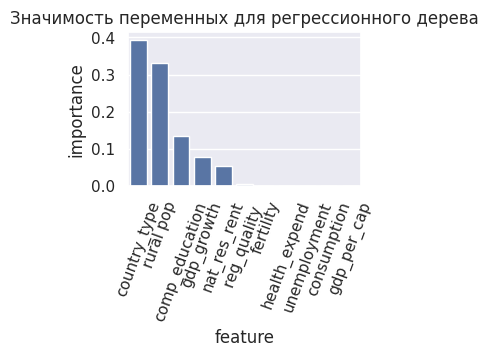

In [ ]:
sns.barplot(data= feat, x = 'feature', y = 'importance', color= 'b').set(title = 'Значимость переменных для регрессионного дерева')
plt.xticks(rotation=70)
plt.tight_layout()
sns.set(rc={'figure.figsize':(7,7)})

## Построение регрессионного дерева для подвыборки развивающихся стран

In [ ]:
df_new = df[df['country_type'] == 'developing']
X_new = df_new.drop(['bottom_50', 'top_10', 'target', 'Country','country_type'], axis = 1)
y_new = df_new['target']

In [ ]:
X_train_new, X_test_new,y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.3, random_state = 12)

In [ ]:
max_depth_list_new = list(range(1,20))
min_samples_leaf_new = list(range(1,20))
mse_list_new = []

In [ ]:
for i in max_depth_list_new:
    for j in min_samples_leaf_new:
        dt = DecisionTreeRegressor(max_depth = i, min_samples_leaf = j, random_state = 12)
        dt.fit(X_train_new, y_train_new)
        mse_list_new.append([mean_squared_error(y_test_new, dt.predict(X_test_new)), i, j])

In [ ]:
sorted(mse_list_new)[0]

[2.7727899894699117, 4, 2]

In [ ]:
dt_final_new = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, random_state = 12)

In [ ]:
dt_final_new.fit(X_train_new, y_train_new)
dt_final_new.predict(X_test_new)

array([3.33815016, 5.34505106, 4.78668372, 4.78668372, 4.78668372,
       3.33815016, 3.33815016, 3.33815016, 4.20432331, 3.33815016,
       8.09581555, 5.34505106, 5.34505106, 3.33815016, 3.33815016,
       3.33815016, 3.33815016, 3.33815016, 3.23644637, 4.20432331,
       3.33815016, 3.33815016, 3.33815016, 3.33815016, 3.33815016,
       3.23644637, 4.20432331, 3.33815016, 4.20432331])

In [ ]:
feat_new = pd.DataFrame(
    {"feature": X_new.columns, "importance": dt_final_new.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

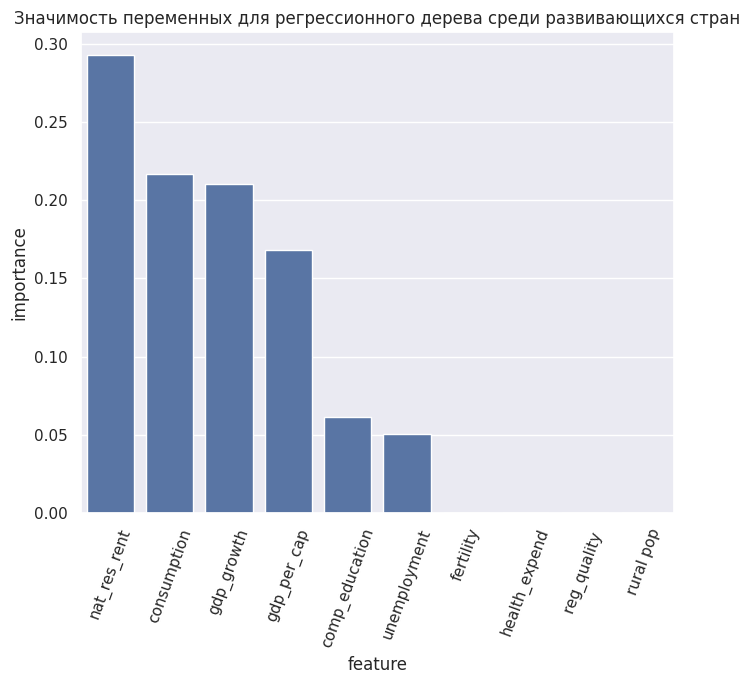

In [ ]:
sns.barplot(data= feat_new, x = 'feature', y = 'importance', color= 'b').set(title = 'Значимость переменных для регрессионного дерева среди развивающихся стран')
plt.xticks(rotation=70)
plt.tight_layout()

## Регрессионная модель для подвыборки развивающихся стран

In [ ]:
X_for_lr_3 = df_for_reg[df_for_reg['country_type_developing'] == 1].drop(['consumption','target','top_10','bottom_50','comp_education','country_type_developing'],axis = 1)
y_for_lr_3 =  df_for_reg[df_for_reg['country_type_developing'] == 1]['target']

In [ ]:
sm.OLS(y_for_lr_3, sm.add_constant(X_for_lr_3)).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     2.638
Date:                Fri, 15 Dec 2023   Prob (F-statistic):             0.0123
Time:                        14:46:09   Log-Likelihood:                -180.85
No. Observations:                  95   AIC:                             379.7
Df Residuals:                      86   BIC:                             402.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3516      1.194      1.970      0.052      -0.022       4.725
gdp_growth        0.0511      0.038      1.345      0.182      -0.024       0.127
nat_res_rent      0.0216      0.019      1.125      0.264      -0.017       0.060
fertility         0.4893      0.205      2.392      0.019       0.083       0.896
health_expend     0.1661      0.094      1.769      0.080      -0.021       0.353
reg_quality      -0.1376      0.372     -0.370      0.713      -0.878       0.603
unemployment     -0.0159      0.042     -0.379      0.706      -0.099       0.068
rural pop        -0.0292      0.013     -2.324      0.022      -0.054      -0.004
gdp_per_cap    7.507e-06   3.23e-05      0.232      0.817   -5.67e-05    7.18e-05
==============================================================================
Omnibus:                        7.046   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.687
Skew:                           0.638   Prob(JB):                       0.0353
Kurtosis:                       3.249   Cond. No.                     6.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""